In [1]:
#analyzing CO2 data, start with a class for simulataneous fitting of cross and WLF parameters.

#Hi
import csv
import pandas as pd
import glob
import os
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.signal import savgol_filter
from scipy import special as spe
import seaborn as sns
import math
# Apply the default theme

class fitCrossAndWLF(filelocation):
    def __init__(self):
        self.filelocation = fileLocation
        self.ReadData = self.loadData
        
        
    #loads data from excel file into a pandas dataframe.
    def loadData(self):
        ReadData = pd.read_excel(self.filelocation, header = [0])
        return ReadData
    
    #Takes a selection of data and tries to fit the WLF model and 
    def fitWLFCrossModel(self,slickOfData):
    
    
    
    
    
    
    
    
    
    
    
    
    

     Average Relative Conc. [-]  Temperature [K]        Time (s)
0                      0.023590              373        1.000000
1                      0.023629              373        1.778279
2                      0.023700              373        3.162278
3                      0.023825              373        5.623413
4                      0.024046              373       10.000000
..                          ...              ...             ...
120                    0.680346              423   100000.000000
121                    0.825430              423   177827.941004
122                    0.939797              423   316227.766017
123                    0.990925              423   562341.325190
124                    0.999686              423  1000000.000000

[125 rows x 3 columns]


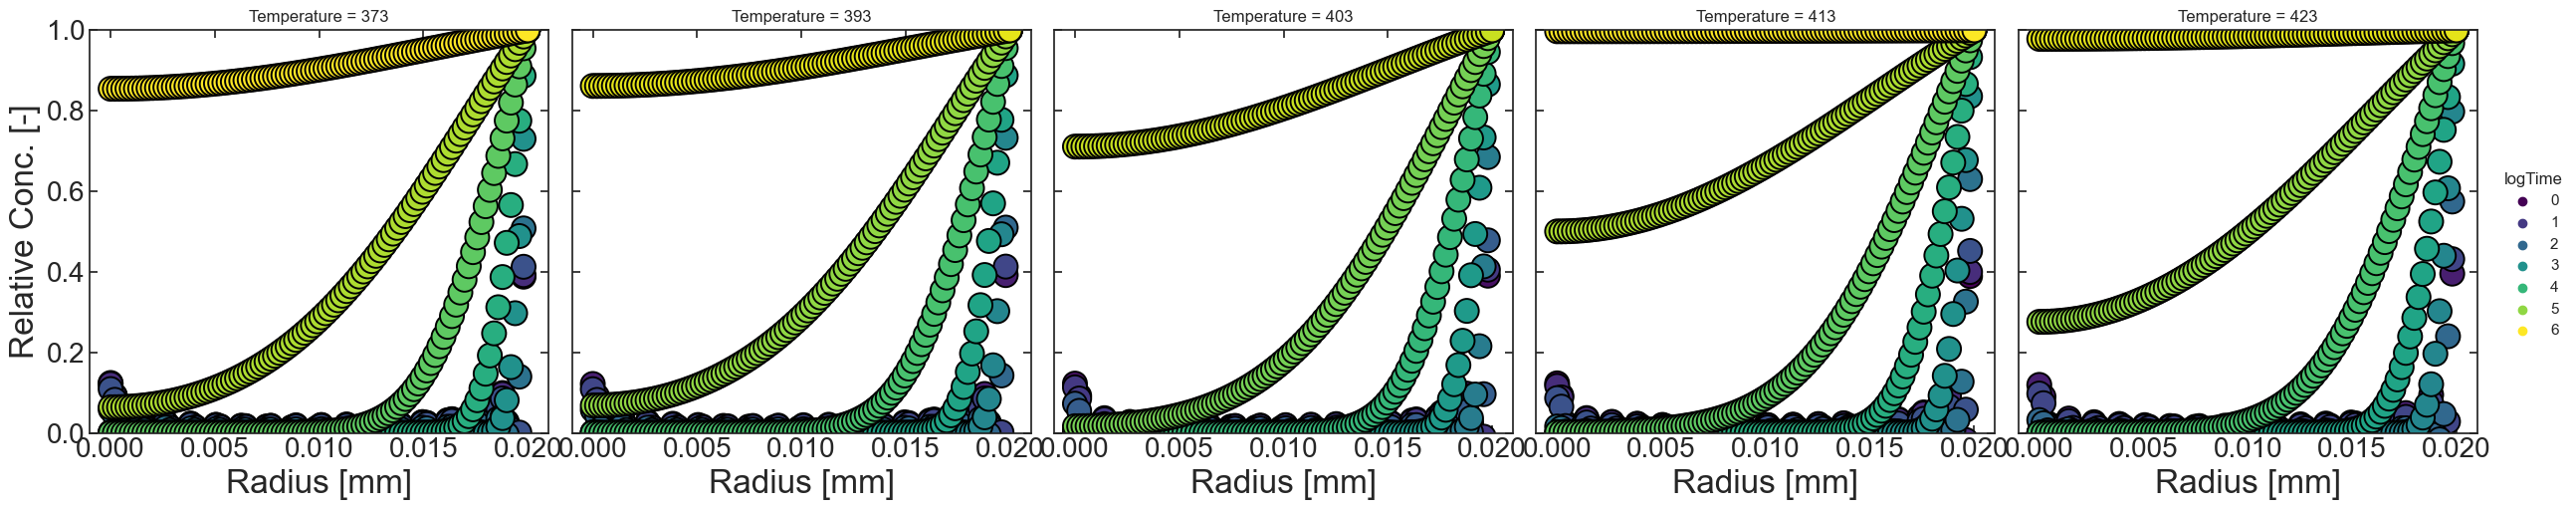

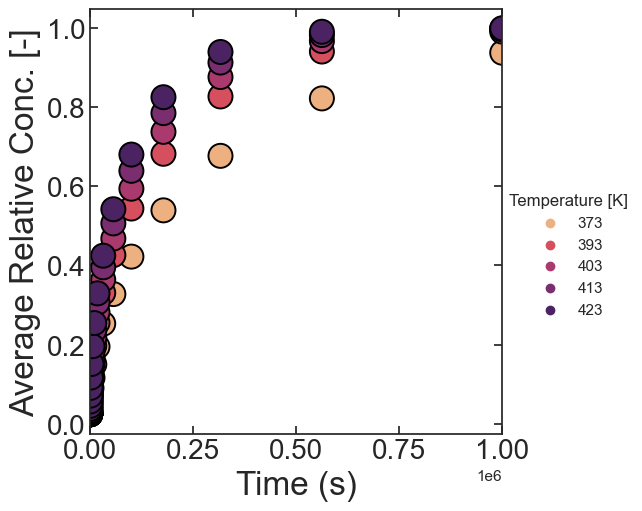

In [1]:
#Hi
import csv
import pandas as pd
import glob
import os
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.signal import savgol_filter
from scipy import special as spe
import seaborn as sns
import math
# Apply the default theme

#########################################################################################  #########################################################################################    
#style guidelines for Seaborne
sns.set(rc={"xtick.top" : True, "ytick.right" : True})
sns.set_theme()  
sns.set_style(style='white')
sns.set_style("ticks")

sns.set_style({"xtick.direction": "in","ytick.direction": "in"})


#########################################################################################  #########################################################################################


#Variables
R = 20e-3#mm
RadialResolution = 100
r = np.linspace(0,R,100)
RadialSpace = R/RadialResolution
#print(r)
Temperatures = [100,120,130,140,150]
#D is dependent on temperature, below is a placeholder
#D = 1.1e-5
Co = 1
Times = np.logspace(0,6,25)

#[0.01,10,100,1000,10000,100000,1000000]
numberofZeroes = 32
ZerosOfB = spe.jn_zeros(0, numberofZeroes)



avgValList = []
n = 0
dflist = []
for T in Temperatures:
    Temp1 = T+273
    Diff = (1.820*10**-14)*Temp1**2 - (7.17266*10**-12)*Temp1 + (3.09293*10**-10)
    D= Diff
    #print(D)
    for t in Times:
        Clist = []
        for r1 in r:
            Besselpart = 1-2*(spe.jv(0,ZerosOfB*r1/R)/(ZerosOfB*spe.jv(1,ZerosOfB))*np.exp(-ZerosOfB**2*D*t/R**2)).sum()
            
            Clist.append(Besselpart)
        rbessle =  np.multiply( np.asarray(Clist),np.asarray(r))*RadialSpace
        
        averageVal = 2*rbessle.sum()/R**2
        
        avgValList.append((averageVal,Temp1,t))
        
        #print([r,Clist])
        df1 = pd.DataFrame(zip(list(r),Clist), columns = ["radius", "Relative concentration"])
        df1["Time (s)"] = t
        df1["Temperature"] = Temp1
        if n%3 == 0:
            dflist.append(df1)
        n += 1
FullDF = pd.concat(dflist).reset_index()
#print(FullDF)
FullDF["logTime"] = np.log10(FullDF["Time (s)"] )

ConcDf = pd.DataFrame(avgValList, columns = ["Average Relative Conc. [-]","Temperature [K]", "Time (s)"])
print(ConcDf)

a1 = sns.relplot(
    data=FullDF, kind = "scatter", col = "Temperature" ,
    x="radius", y="Relative concentration",  hue= "logTime",  palette = "viridis",facet_kws=dict(despine=False), s = 300, edgecolor = "black"
    );
a1.set(ylim=(0.0,1)) 
a1.set_axis_labels("Radius [mm]", "Relative Conc. [-]",fontsize = 24)
for ax in a1.axes.ravel():
        
        ax.tick_params(which="both", right=True, labelsize = 20)
        ax.tick_params(which="both", top=True)
        ax.tick_params(which = "both",left=True, labelsize = 20)
        

plt.show()
a1.savefig("I:/My Drive/Research/OtherProjects/HiPressure/RawFigs/Larger.png", dpi = 800)

a2 = sns.relplot(
    data=ConcDf, kind = "scatter", hue = "Temperature [K]" ,
    x="Time (s)", y="Average Relative Conc. [-]",    palette = "flare",facet_kws=dict(despine=False), s = 300, edgecolor = "black"
    );

for ax in a2.axes.ravel():
        
        ax.tick_params(which="both", right=True, labelsize = 20)
        ax.tick_params(which="both", top=True)
        ax.tick_params(which = "both",left=True, labelsize = 20)
a2.set_axis_labels("Time (s)", "Average Relative Conc. [-]",fontsize = 24)
a2.set(xlim=(0.0,1000000)) 
a2.savefig("I:/My Drive/Research/OtherProjects/HiPressure/RawFigs/Smaller.png", dpi = 800)
#a2.set(xscale="log")   

In [10]:
#Hi
import csv
import pandas as pd
import glob
import os
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.signal import savgol_filter
from scipy import special as spe
import seaborn as sns
import math
# Apply the default theme

#########################################################################################  #########################################################################################    
#style guidelines for Seaborne
sns.set(rc={"xtick.top" : True, "ytick.right" : True})
sns.set_theme()  
sns.set_style(style='white')
sns.set_style("ticks")

sns.set_style({"xtick.direction": "in","ytick.direction": "in"})


#########################################################################################  #########################################################################################

path = "I:\My Drive\Research\OtherProjects\HiPressure\SolutibiltyPolystyreneWith.xlsx"
DataForPS = pd.read_excel(path)
print(DataForPS)
DataForPS["Pressure [MPa]"] = DataForPS["Pressure"]





a1 = sns.relplot(
    data=DataForPS, kind = "scatter", style = "Pressure [MPa]",
    x="Temperature", y="Solubility",  hue= "Pressure [MPa]",  palette = "flare",facet_kws=dict(despine=False), s = 300, edgecolor = "black"
    );
a1.set(xlim=(350,500)) 
a1.set_axis_labels("Temperature [K]", "Solubility [g/kg]",fontsize = 24)
for ax in a1.axes.ravel():
        
        ax.tick_params(which="both", right=True, labelsize = 20)
        ax.tick_params(which="both", top=True)
        ax.tick_params(which = "both",left=True, labelsize = 20)
        

plt.show()
a1.savefig("I:/My Drive/Research/OtherProjects/HiPressure/RawFigs/SolubilityPS.png", dpi = 800)

    Storage modulus  Loss modulus  Tan(delta)  Angular frequency  \
0          0.033337      0.017911    0.537276          99.974300   
1          0.027998      0.016820    0.600774          63.094500   
2          0.023133      0.015244    0.658993          39.811300   
3          0.018779      0.013659    0.727359          25.121500   
4          0.014984      0.011999    0.800816          15.850000   
5          0.011727      0.010328    0.880750          10.000500   
6          0.009017      0.008691    0.963794           6.309450   
7          0.006835      0.007158    1.047370           3.981130   
8          0.005129      0.005812    1.133300           2.511890   
9          0.003794      0.004622    1.218290           1.584900   
10         0.002786      0.003622    1.299950           1.000000   
11         0.002034      0.002812    1.382860           0.630957   
12         0.001472      0.002159    1.466520           0.398107   
13         0.001064      0.001661    1.560360   

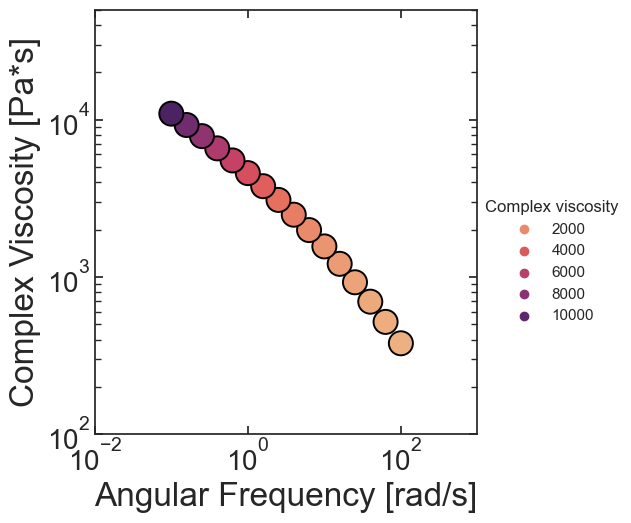

In [22]:
#Hi
import csv
import pandas as pd
import glob
import os
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.signal import savgol_filter
from scipy import special as spe
import seaborn as sns
import math
# Apply the default theme

#########################################################################################  #########################################################################################    
#style guidelines for Seaborne
sns.set(rc={"xtick.top" : True, "ytick.right" : True})
sns.set_theme()  
sns.set_style(style='white')
sns.set_style("ticks")

sns.set_style({"xtick.direction": "in","ytick.direction": "in"})


#########################################################################################  #########################################################################################

path = "I:\My Drive\Research\OtherProjects\HiPressure/35CData.xlsx"
DataForPS = pd.read_excel(path)
print(DataForPS)







a1 = sns.relplot(
    data=DataForPS, kind = "scatter", hue = "Complex viscosity",
    x="Angular frequency", y="Complex viscosity",    palette = "flare",facet_kws=dict(despine=False), s = 300, edgecolor = "black"
    );
a1.set(ylim=(100,50000)) 
a1.set(xlim=(0.01,1000)) 
a1.set_axis_labels( "Angular Frequency [rad/s]", "Complex Viscosity [Pa*s]" ,fontsize = 24)
for ax in a1.axes.ravel():
        
        ax.tick_params(which="both", right=True, labelsize = 20)
        ax.tick_params(which="both", top=True)
        ax.tick_params(which = "both",left=True, labelsize = 20)
        
a1.set(yscale="log", xscale = "log")
plt.show()
a1.savefig("I:/My Drive/Research/OtherProjects/HiPressure/RawFigs/PressureViscosity.png", dpi = 800)



     Angular Frequency  Complex viscosity  Temperature  Pressure  \
0                 14.1            732.650          100        60   
1                 18.5            632.820          100        60   
2                 24.3            545.830          100        60   
3                 32.0            469.560          100        60   
4                 42.2            404.490          100        60   
..                 ...                ...          ...       ...   
363               55.5             87.627          150         0   
364               73.1             81.546          150         0   
365               96.2             73.258          150         0   
366              127.0             67.673          150         0   
367              167.0             62.248          150         0   

     Shift Factor  Pshift  
0        9.409923     NaN  
1        9.409923     NaN  
2        9.409923     NaN  
3        9.409923     NaN  
4        9.409923     NaN  
..            .

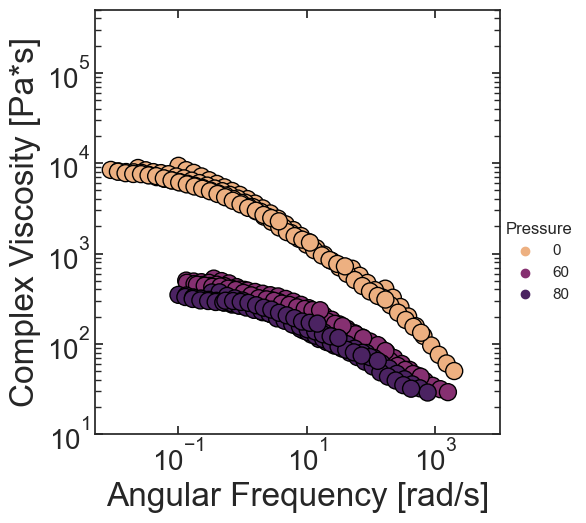

In [12]:
#analyzing CO2 data

#Hi
import csv
import pandas as pd
import glob
import os
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.signal import savgol_filter
from scipy import special as spe
import seaborn as sns
import math
# Apply the default theme

#########################################################################################  #########################################################################################    
#style guidelines for Seaborne
sns.set(rc={"xtick.top" : True, "ytick.right" : True})
sns.set_theme()  
sns.set_style(style='white')
sns.set_style("ticks")

sns.set_style({"xtick.direction": "in","ytick.direction": "in"})
from scipy.optimize import curve_fit

#########################################################################################  #########################################################################################




path = "I:\My Drive\Research\OtherProjects\HiPressure/ML/SteadyStateDataPS/CombinedDataPS.xlsx"
DataForPSRheo = pd.read_excel(path, header = [0])
print(DataForPSRheo)

#DataForPSRheo = DataForPSRheo.drop(DataForPSRheo[(DataForPSRheo['Pressure'] == 60 ) ].index)
#DataForPSRheo = DataForPSRheo.drop(DataForPSRheo[(DataForPSRheo['Pressure'] == 80 ) ].index)

DataForPSRheo["FreqShift"] = DataForPSRheo["Angular Frequency"]*DataForPSRheo["Shift Factor"]
DataForPSRheo["ViscShift"] = DataForPSRheo["Complex viscosity"]*120/(DataForPSRheo["Shift Factor"]*DataForPSRheo["Temperature"])
initVals = [1,1]







a1 = sns.relplot(
    data=DataForPSRheo, kind = "scatter", hue = "Pressure", #col = "Pressure",
    x="FreqShift", y="ViscShift",    palette = "flare",facet_kws=dict(despine=False), s = 150, edgecolor = "black"
    );
a1.set(ylim=(10,500000)) 
a1.set(xlim=(0.005,10000)) 
a1.set_axis_labels( "Angular Frequency [rad/s]", "Complex Viscosity [Pa*s]" ,fontsize = 24)
for ax in a1.axes.ravel():
        
        ax.tick_params(which="both", right=True, labelsize = 20)
        ax.tick_params(which="both", top=True)
        ax.tick_params(which = "both",left=True, labelsize = 20)
        
a1.set(yscale="log", xscale = "log")
plt.show()
a1.savefig("I:/My Drive/Research/OtherProjects/HiPressure/RawFigs/PressureViscosity.png", dpi = 800)

    Temperature (K)  Pressure (MPa)  Solubility  From
0            373.15           2.068       12.74  Sato
1            373.15           2.627       16.13  Sato
2            373.15           4.093       25.29  Sato
3            373.15           4.629       28.71  Sato
4            373.15           6.038       37.53  Sato
..              ...             ...         ...   ...
86           363.00           0.000        0.00   NaN
87           353.00           0.000        0.00   NaN
88           343.00           0.000        0.00   NaN
89           333.00           0.000        0.00   NaN
90           323.00           0.000        0.00   NaN

[91 rows x 4 columns]
[ 3.63882395e+02  1.97964608e+01 -1.76746657e+00 -7.11818187e-02
  2.11073356e-03 -3.34709165e-02]


C:\Users\Himendra\AppData\Local\Temp\ipykernel_50080\2773092062.py:70: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  d = DataForPS.groupby(["Temperature (K)"]).mean()


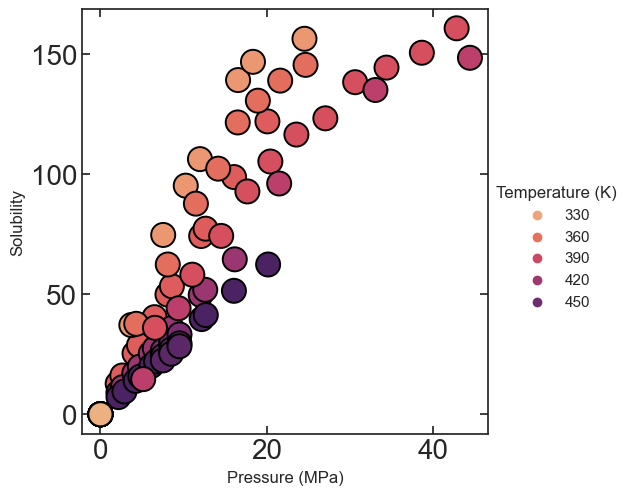

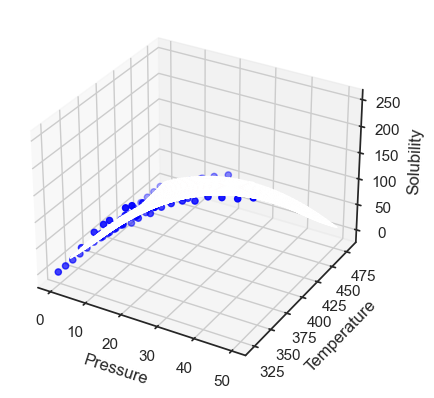

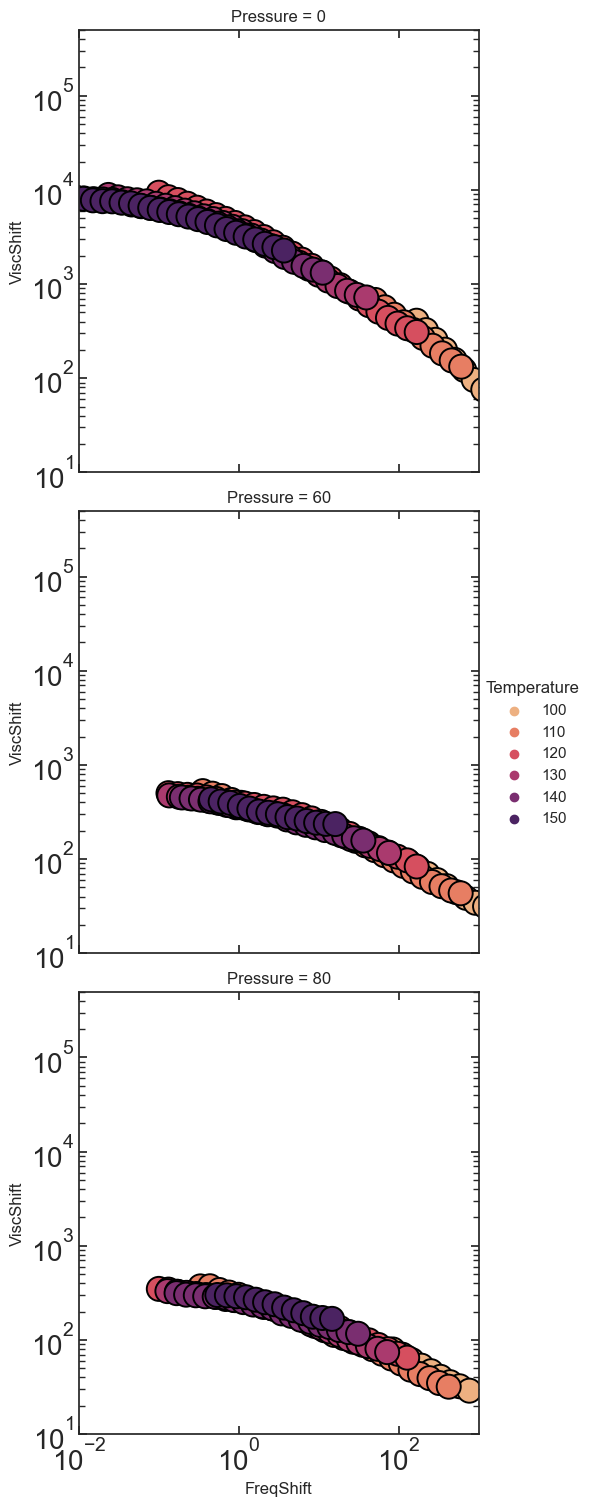

[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]
pressure is:  60  r2 is: 0.9924342383870515
4.503418806151003 107.17169057215267
[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]
pressure is:  80  r2 is: 0.9783640066062403
4.923598797877295 134.01124615720263
[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]
pressure is:  0  r2 is: 0.9972132486248287
454.3353069312443 7999.986023417074
hello     Temperature         at  Pressure
0           100  10.795174        60
1           101   9.341911        60
2           102   8.110547    

C:\Users\Himendra\AppData\Local\Temp\ipykernel_50080\2773092062.py:180: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  a1 = sns.scatterplot(
C:\Users\Himendra\AppData\Local\Temp\ipykernel_50080\2773092062.py:180: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  a1 = sns.scatterplot(
C:\Users\Himendra\AppData\Local\Temp\ipykernel_50080\2773092062.py:180: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  a1 = sns.scatterplot(


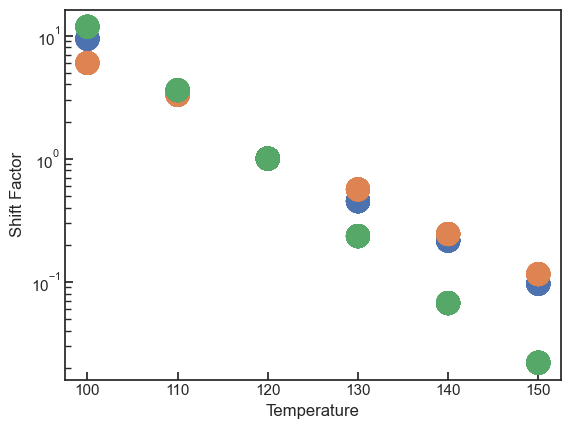

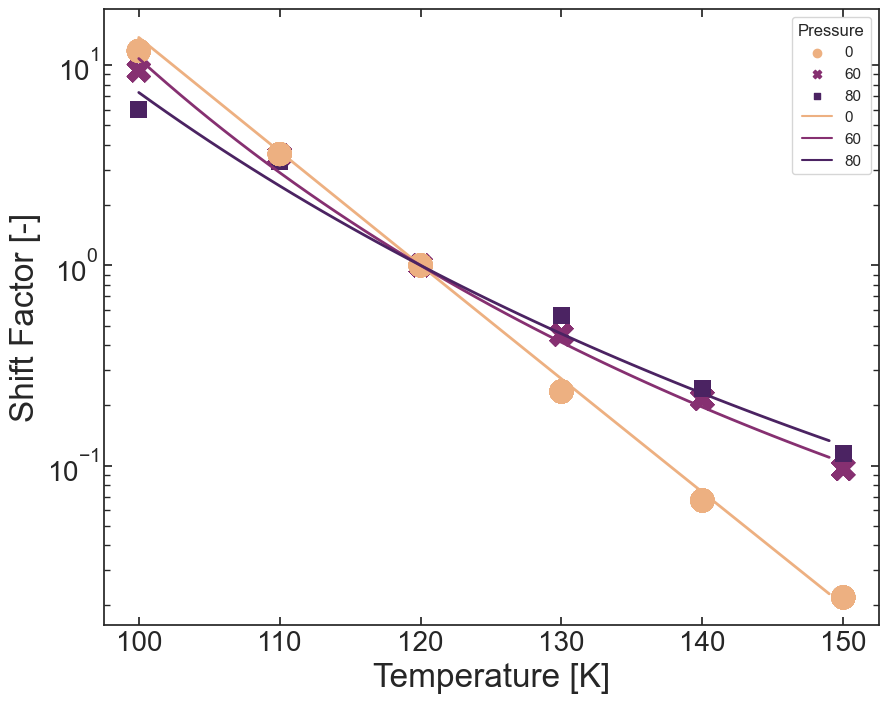

[2.78667730e-01 4.73315129e-01 5.90409595e+02 1.17730921e-14]


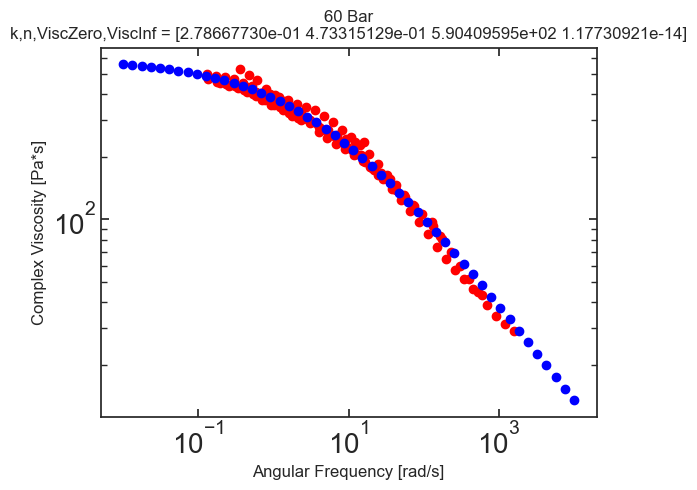

[2.20228888e-01 6.30388359e-01 3.69158775e+02 1.95048830e+01]


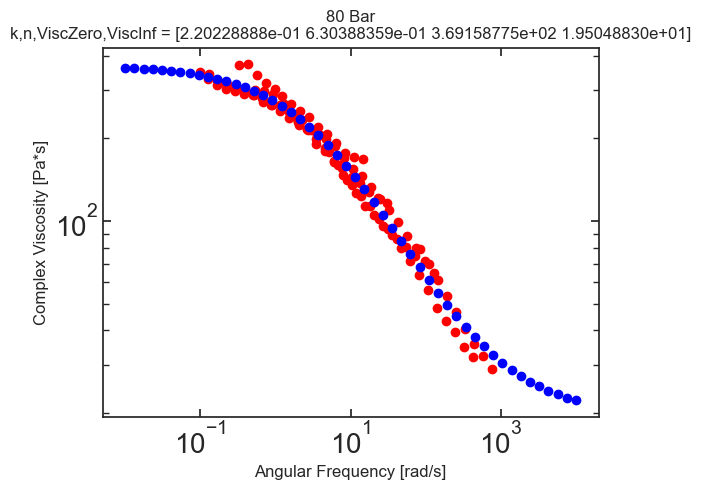

[1.49109545e+00 6.56460753e-01 8.75440717e+03 2.50000000e+01]


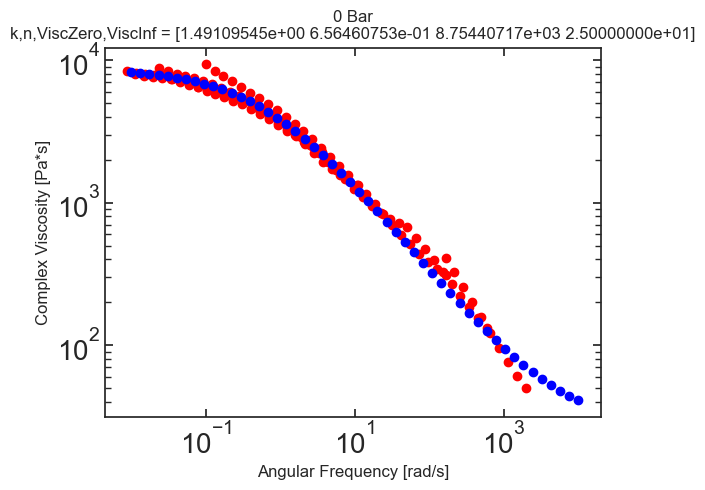

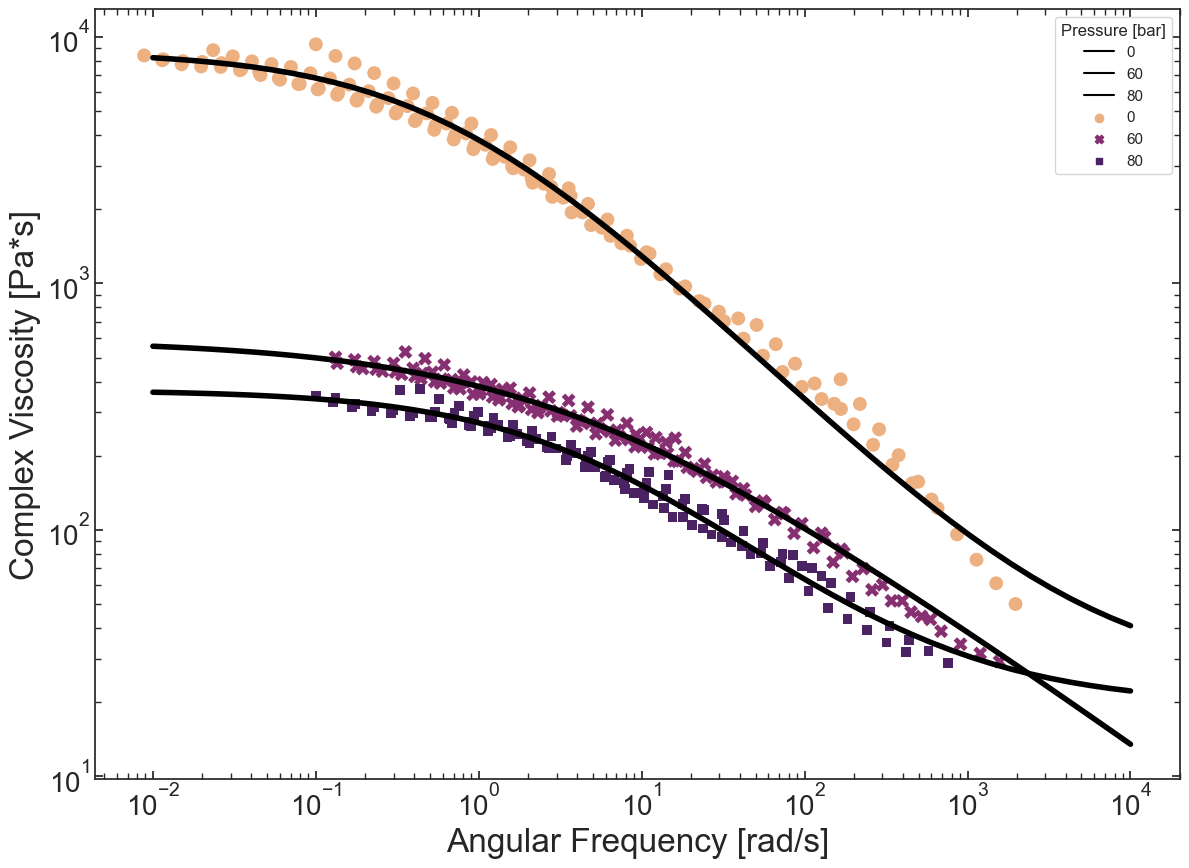

   Pressure     slope  intercept        r2
0        60 -0.091431  11.201537  0.987030
1        80 -0.081484   9.989919  0.987894
2         0 -0.128281  15.323104  0.998218
0.000591707152456754 -0.12801172373003225 -0.0671328106941123 15.304384510175174


C:\Users\Himendra\AppData\Local\Temp\ipykernel_50080\2773092062.py:337: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  a1 = sns.relplot(
C:\Users\Himendra\AppData\Local\Temp\ipykernel_50080\2773092062.py:341: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  a1 = sns.relplot(
F:\AnacondaCode\envs\Pandas\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


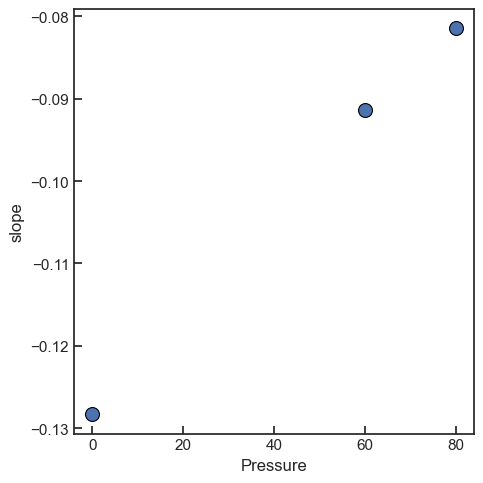

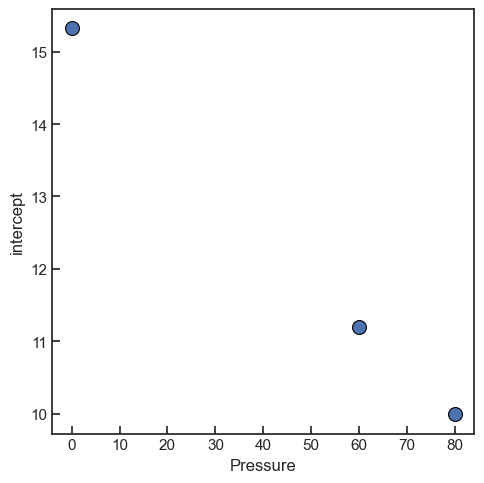

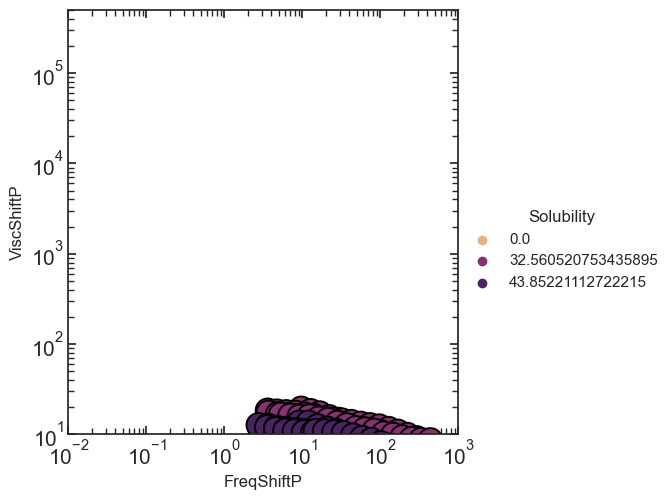

0.001000000000924997 99.99999999999909
ooptimium [2.0, 44.0] 641748.1710716229
ooptimium [2.1, 44.0] 616283.8391361348
ooptimium [2.2, 44.0] 585005.9570141479
ooptimium [2.3000000000000003, 44.0] 547228.4631264682
ooptimium [2.4000000000000004, 44.0] 502218.002782478
ooptimium [2.5000000000000004, 44.0] 449133.12182937696
ooptimium [2.6000000000000005, 44.0] 387112.44493894756
ooptimium [2.7000000000000006, 44.0] 316115.4387466207
ooptimium [2.8000000000000007, 44.0] 240552.20200862194
ooptimium [2.900000000000001, 44.0] 180506.47571968473
ooptimium [3.000000000000001, 44.0] 173475.52574027158
ooptimium [3.000000000000001, 44.1] 172515.8193407986
ooptimium [3.000000000000001, 44.2] 171622.74063851885
ooptimium [3.000000000000001, 44.300000000000004] 170971.7113821188
ooptimium [3.000000000000001, 44.400000000000006] 170409.04119238871
ooptimium [3.000000000000001, 44.50000000000001] 170026.924616086
ooptimium [3.000000000000001, 44.60000000000001] 169777.02036156855
ooptimium [3.000000

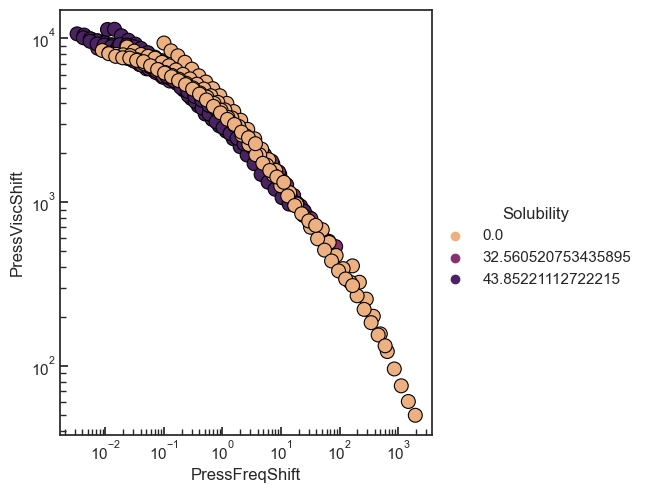

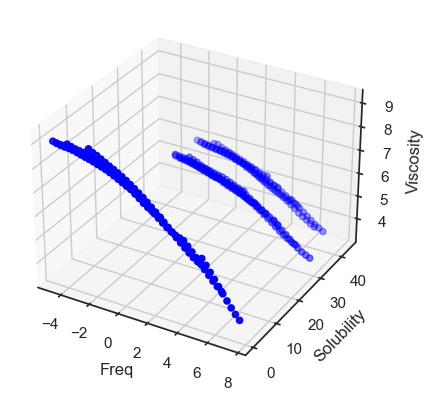

In [92]:
#analyzing CO2 data

#Hi
import csv
import pandas as pd
import glob
import os
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.signal import savgol_filter
from scipy import special as spe
import seaborn as sns
import math
from scipy import stats
from scipy.optimize import curve_fit, minimize
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
#from mpl_toolkits.mplot3d import Axes3
# Apply the default theme

#########################################################################################  #########################################################################################    
#style guidelines for Seaborne
sns.set(rc={"xtick.top" : True, "ytick.right" : True})
sns.set_theme()  
sns.set_style(style='white')
sns.set_style("ticks")

sns.set_style({"xtick.direction": "in","ytick.direction": "in"})


#########################################################################################  #########################################################################################

def function(xy, a,b,c,d,e,f):
    x,y = xy
    return a+ b*x+c*y+d*x**2+e*y**2+f*x*y

def crossModel(x,k,n,zeroS,infS):
    
    return ((zeroS-infS)/(1+(k*x)**n)+infS)

#fit for concentration
def fitAt(xc,C1,C2):
    k=1.49109545
    n = 0.656460753
    zeroS = 8754.40717
    infS = 25
    x,c = xc
    co = 0
    C1_1 = np.log10(C1)
    C2_1 = np.log10(C2)
    at =10**(-C1*(c-co)/(C2+c-co))
    return ((zeroS-infS)/(1+(k*x* at )**n)+infS)/at


def FitAt2(t, C1,C2):
    to = 120
    return ((-C1*(t-to)/(C2+t-to)))
def FitAt3(t, C1,C2):
    to = 120
    return ((-C1*(t-to)/(C2+t-to)))  

##############
#Load in our solubility data
path = "I:\My Drive\Research\OtherProjects\HiPressure/ML/SteadyStateDataPS/SolubilityPS.xlsx"
DataForPS = pd.read_excel(path, header = [0])
print(DataForPS)
UniqueTemps = DataForPS["Temperature (K)"].unique()
d = DataForPS.groupby(["Temperature (K)"]).mean()


############################################################################################################################################
#plot solubility data
a1 = sns.relplot(
    data=DataForPS, kind = "scatter", hue = "Temperature (K)",
    x="Pressure (MPa)", y="Solubility",    palette = "flare",facet_kws=dict(despine=False), s = 300, edgecolor = "black"
    );
#a1.set(ylim=(10,500000)) 
#a1.set(xlim=(0.01,1000)) 
#a1.set_axis_labels( "Angular Frequency [rad/s]", "Complex Viscosity [Pa*s]" ,fontsize = 24)
for ax in a1.axes.ravel():
        
        ax.tick_params(which="both", right=True, labelsize = 20)
        ax.tick_params(which="both", top=True)
        ax.tick_params(which = "both",left=True, labelsize = 20)
##############################################################################################################################









##############################################################################################################################
#fitting solubility data
x= DataForPS["Pressure (MPa)"]
y=DataForPS["Temperature (K)"]
z=DataForPS["Solubility"]

popt, pcov = curve_fit(function, (x, y), z)
# Print optimized parameters
print(popt)        
        
        
#a1.set(yscale="log", xscale = "log")
plt.show()

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, color='blue')
x_range = np.linspace(0, 50, 50)
y_range = np.linspace(340, 480,50)
X, Y = np.meshgrid(x_range, y_range)
Z = function((X, Y), *popt)
ax.plot_surface(X,Y,Z, color='red', alpha=0.5)
ax.set_xlabel('Pressure')
ax.set_ylabel('Temperature')
ax.set_zlabel('Solubility')
plt.show()
                      
##############################################################################################################################
#looking at solubility data vs viscoisity
    
path = "I:\My Drive\Research\OtherProjects\HiPressure/ML/SteadyStateDataPS/CombinedDataPS.xlsx"
DataForPSRheo = pd.read_excel(path, header = [0])
DataForPSRheo["FreqShift"] = DataForPSRheo["Angular Frequency"]*DataForPSRheo["Shift Factor"]
DataForPSRheo["ViscShift"] = DataForPSRheo["Complex viscosity"]*120/(DataForPSRheo["Shift Factor"]*DataForPSRheo["Temperature"])

DataForPSRheo["Solubility"] = np.maximum(function((DataForPSRheo["Pressure"]/10, 120+273), *popt),0)

a1 = sns.relplot(
    data=DataForPSRheo, kind = "scatter", hue = "Temperature", row = "Pressure",
    x="FreqShift", y="ViscShift", palette = "flare",facet_kws=dict(despine=False), s = 300, edgecolor = "black"
    );
a1.set(ylim=(10,500000)) 
a1.set(xlim=(0.01,1000)) 
#a1.set_axis_labels( "Angular Frequency [rad/s]", "Complex Viscosity [Pa*s]" ,fontsize = 24)
for ax in a1.axes.ravel():
        
        ax.tick_params(which="both", right=True, labelsize = 20)
        ax.tick_params(which="both", top=True)
        ax.tick_params(which = "both",left=True, labelsize = 20)
        
a1.set(yscale="log", xscale = "log")
plt.show()
a1.savefig("I:/My Drive/Research/OtherProjects/HiPressure/RawFigs/PressureViscosity.png", dpi = 800)

##############################################################################################################################

##showing dependence of shift factor
DataForPSRheo["Shift Factorlog"] =np.log(DataForPSRheo["Shift Factor"])

UniquePressure = DataForPSRheo["Pressure"].unique()

#finding WLF parameters
listOfPressureAndAt = {}
dataFrameAtCalcs = []
for pressure in UniquePressure:
    DataFrame1 = DataForPSRheo[(DataForPSRheo["Pressure"]==pressure)]
    shiftFactor = np.log10(DataFrame1["Shift Factor"])
    Temperature = DataFrame1["Temperature"]
    TempRange = np.arange(100, 150, 1)
    print(TempRange)
    boundInd = ((1,1),(1000,8000))
    popt, pcov = curve_fit(FitAt2, Temperature, shiftFactor, bounds = boundInd)
    listOfPressureAndAt[pressure] = [popt,pcov]
    TestCase1 = pd.DataFrame(data=TempRange, columns = ["Temperature"])
    TestCase1["at"] = (10**FitAt3(TestCase1["Temperature"],*popt))
    
    logShiftFactorCalc = FitAt3(DataFrame1["Temperature"],*popt)
    r2 = r2_score(shiftFactor,logShiftFactorCalc)
    print("pressure is: ", pressure, " r2 is:", r2)
    
    #TestCase1["at"] = 10**(yeeTwo)
    TestCase1["Pressure"] = pressure 
    a1 = sns.scatterplot(
    data=DataFrame1, 
    x="Temperature", y="Shift Factor", palette = "flare", s = 300, edgecolor = "none"
    );
    a1.set(yscale="log")
    
    print(*popt)
    dataFrameAtCalcs.append(TestCase1)
    
TotalAtData = pd.concat(dataFrameAtCalcs)
print("hello", TotalAtData)
DataForPSRheo["Pressure [Bar]"] = DataForPSRheo["Pressure"]
fig, ax = plt.subplots(figsize=(10, 8))
colorThing = ["black","black", "black"]
a1 = sns.scatterplot(
    data=DataForPSRheo, hue = "Pressure [Bar]", style = "Pressure [Bar]",
    x="Temperature", y="Shift Factor", palette = "flare", s = 300, edgecolor = "none", ax = ax
    );
a2 = sns.lineplot(
    data=TotalAtData, hue = "Pressure",
    x="Temperature", y="at", palette = "flare", linewidth = 2,  ax = ax
    );
plt.yscale("log")
ax.set_xlabel( "Temperature [K]",fontsize = 24)
ax.set_ylabel(  "Shift Factor [-]", fontsize = 24)

ax.tick_params(which="both", right=True, left= True,labelsize = 20)
ax.tick_params(which="both", bottom = True, top=True, labelsize = 20)


        
plt.savefig("I:/My Drive/Research/OtherProjects/HiPressure/RawFigs/ShiftPressureViscosity.png", dpi = 800)
plt.show()







##############################################################################################################################
#fit cross model
#fitting solubility data

#shift factor to log data
dataFrameCol = []
UniquePressure = DataForPSRheo["Pressure"].unique()
combinedRegressionData = []
for pressure in UniquePressure:
    DataFrame1 = DataForPSRheo[(DataForPSRheo["Pressure"]==pressure)]
    
    
    
    
    x= DataFrame1["FreqShift"]
    xlog = np.log(DataFrame1["FreqShift"])
    z=DataFrame1["ViscShift"]
    zlog = np.log(DataFrame1["ViscShift"])
    #print(DataFrame1)
    
    #z=DataForPS["Solubility"]
    #crossModel(x,k,n,zeroS,infS)
    popt, pcov = curve_fit(crossModel, x, z, bounds = ((0,-5,100,0),(4,5,100000,25))  )
    # Print optimized parameters
    print(popt)        
    #popt[-1] = 15
    fig = plt.figure()    
    #a1.set(yscale="log", xscale = "log")
    #plt.show()


    ax = fig.add_subplot(111)
    ax.scatter(x, z, color='red')
    x_range = np.logspace(-2, 4, 50)
    x_rangelog = np.log(x_range)

    Z = crossModel(x_range, *popt)

    ax.scatter(x_range, Z, color='blue')
    
    DataFrameFitData = pd.DataFrame(data = list(zip(x_range,Z)), columns = ["Frequency", "ComplexViscosity"])
    DataFrameFitData["DataType"] = "Fit" 
    DataFrameActualData = pd.DataFrame(data = list(zip(x,z)), columns = ["Frequency", "ComplexViscosity"])
    DataFrameActualData["DataType"] = "Actual" 
    DataCombo = pd.concat([DataFrameFitData,DataFrameActualData])
    DataCombo["Pressure [bar]"] = pressure
    dataFrameCol.append(DataCombo)

    ax.set(yscale="log", xscale = "log")
    #print("pressure",pressure)
    ax.set_xlabel("Angular Frequency [rad/s]")
    ax.set_ylabel( "Complex Viscosity [Pa*s]")

    ax.set_title(str(pressure)  +" Bar"+"\nk,n,ViscZero,ViscInf = " +str(popt))
    ax.tick_params(which="both", right=True, labelsize = 20)
    ax.tick_params(which="both", top=True)
    ax.tick_params(which = "both",left=True, labelsize = 20)
    #fig.set_axis_labels( , ,fontsize = 24)
    plt.savefig("I:/My Drive/Research/OtherProjects/HiPressure/RawFigs/"+str(pressure)+"barFit.png", dpi = 800, bbox_inches='tight')
    plt.show()

    ################
    #getting relationship between pressure and shift factor parameter
    #data2 = DataFrame1.groupby("Temperature")
    RegressionOut = stats.linregress(x = DataFrame1["Temperature"], y = DataFrame1["Shift Factorlog"])
    RegressionData = [pressure, RegressionOut.slope,RegressionOut.intercept,RegressionOut.rvalue**2]
    #rint(str(pressure)+" ",RegressionOut.slope, RegressionOut.intercept, RegressionOut.rvalue**2)
    combinedRegressionData.append(RegressionData)

    
    
#Combined Data regression, cleaned
DataComboCombined = pd.concat(dataFrameCol)
DataComboCombined.to_csv("I:/My Drive/Research/OtherProjects/HiPressure/RawFigs/output.csv")
DataComboRealData = DataComboCombined[(DataComboCombined["DataType"]=="Actual")]
DataComboFitData = DataComboCombined[(DataComboCombined["DataType"]=="Fit")]

hueOrder = ["black","black","black"]

fig, ax = plt.subplots(figsize=(14, 10))
a2 = sns.lineplot(
    data=DataComboFitData,  hue = "Pressure [bar]", markers = False, palette = hueOrder,#style = "Pressure [bar]",
    x="Frequency", y="ComplexViscosity", ax = ax, linewidth = 4
    );
a1 = sns.scatterplot(
    data=DataComboRealData,  style = "Pressure [bar]",  hue = "Pressure [bar]",
    x="Frequency", y="ComplexViscosity", palette = "flare", s = 100, edgecolor = "none", ax = ax
    );

#plt.ylim(10,500000) 
plt.yscale("log")
plt.xscale("log")

#fig.set(xlim=(0.005,50000)) 
#fig.set(yscale="log", xscale = "log"), "Complex Viscosity [Pa*s]" ,
ax.set_xlabel( "Angular Frequency [rad/s]",fontsize = 24)
ax.set_ylabel( "Complex Viscosity [Pa*s]", fontsize = 24)

#for a1 in plt.axes.ravel():
    
ax.tick_params(which="both", right=True, left= True,labelsize = 20)
ax.tick_params(which="both", bottom = True, top=True, labelsize = 20)
#ax.tick_params(which = "both",left=True, labelsize = 20)
#ax.minorticks_on()            
plt.savefig("I:/My Drive/Research/OtherProjects/HiPressure/RawFigs/FitDataCross.png", dpi = 800)

plt.show()
    
    
##############################################################################################################################
#looking at solubility data vs viscoisity    
    
    
combinedAtData = pd.DataFrame(combinedRegressionData, columns = ["Pressure", "slope", "intercept", "r2"])
print(combinedAtData)

############plot slope vs Pressure
a1 = sns.relplot(
    data=combinedAtData, kind = "scatter", 
    x="Pressure", y="slope", palette = "flare",facet_kws=dict(despine=False), s = 100, edgecolor = "black"
    );
a1 = sns.relplot(
    data=combinedAtData, kind = "scatter", 
    x="Pressure", y="intercept", palette = "flare",facet_kws=dict(despine=False), s = 100, edgecolor = "black"
    );

RegressionForSlopes = stats.linregress(x = combinedAtData["Pressure"], y = combinedAtData["slope"])
RegressionForIntercepts = stats.linregress(x = combinedAtData["Pressure"], y = combinedAtData["intercept"])
print(RegressionForSlopes.slope,RegressionForSlopes.intercept, RegressionForIntercepts.slope,RegressionForIntercepts.intercept)










################################################
DataForPSRheo["PShiftFactor"] = 10**((np.log(DataForPSRheo["Solubility"])-60)*0.01+2)

DataForPSRheo["ViscShiftP"] =  DataForPSRheo["ViscShift"]/DataForPSRheo["PShiftFactor"]
DataForPSRheo["FreqShiftP"] = DataForPSRheo["FreqShift"]*DataForPSRheo["PShiftFactor"]


a1 = sns.relplot(
    data=DataForPSRheo, kind = "scatter", hue = "Solubility",
    x="FreqShiftP", y="ViscShiftP", palette = "flare",facet_kws=dict(despine=False), s = 300, edgecolor = "black"
    );
a1.set(ylim=(10,500000)) 
a1.set(xlim=(0.01,1000)) 
for ax in a1.axes.ravel():
        
        ax.tick_params(which="both", right=True, labelsize = 15)
        ax.tick_params(which="both", top=True)
        ax.tick_params(which = "both",left=True, labelsize = 15)
        
a1.set(yscale="log", xscale = "log")
plt.show()

################
#fit to at cross model
x= DataForPSRheo["FreqShift"]
xlog = np.log(DataForPSRheo["FreqShift"])
z=DataForPSRheo["ViscShift"]
k=1.49109545
n = 0.656460753
zeroS = 8754.40717
infS = 25

znew = ((zeroS-infS)/(1+(k*x )**n)+infS)
zlog = np.log(DataForPSRheo["ViscShift"])
c= DataForPSRheo["Solubility"]

popt, pcov = curve_fit(fitAt, (x,c), znew, bounds = ((0.001,0.001),(100,100)) )
c1 = popt[0]
c2 = popt[1]
print(c1, c2)


##optimization algorithm
dataRange = np.arange(2,4,0.1)
dataRange2 = np.arange(44,47,0.1)

rOptimize = 1000000
CparamsOptimize = [0,0]
for c1 in dataRange:
    for c2 in dataRange2:
        #print(c1)
        DataForPSRheo["at"] = 10**(-c1*(c-0)/(c2+c-0))
        DataForPSRheo["PressFreqShift"] = DataForPSRheo["FreqShift"]*DataForPSRheo["at"]
        DataForPSRheo["PressViscShift"] = DataForPSRheo["ViscShift"]/DataForPSRheo["at"]
        resid = np.sum(np.abs(DataForPSRheo["PressViscShift"]-((zeroS-infS)/(1+(k*DataForPSRheo["PressFreqShift"] )**n)+infS)))
        if resid < rOptimize:
            rOptimize = resid
            CparamsOptimize = [c1,c2]
            print("ooptimium",CparamsOptimize,resid)

print(CparamsOptimize)
c1 = CparamsOptimize[0]
c2 = CparamsOptimize[1]
DataForPSRheo["at"] = 10**(-c1*(c-0)/(c2+c-0))
DataForPSRheo["PressFreqShift"] = DataForPSRheo["FreqShift"]*DataForPSRheo["at"]
DataForPSRheo["PressViscShift"] = DataForPSRheo["ViscShift"]/DataForPSRheo["at"]
#DataForPSRheo["CrossModelViscShift"] = ((zeroS-infS)/(1+(k*x*at)**n)+infS)
a1 = sns.relplot(
    data=DataForPSRheo, kind = "scatter", hue = "Solubility",
    x="PressFreqShift", y="PressViscShift", palette = "flare",facet_kws=dict(despine=False), s = 100, edgecolor = "black"
    );
a1.set(yscale="log", xscale = "log")
print(popt)


##try to minimize to get the C constants
x= DataForPSRheo["FreqShift"]
xlog = np.log(DataForPSRheo["FreqShift"])
z=DataForPSRheo["ViscShift"]
zlog = np.log(DataForPSRheo["ViscShift"])
c= DataForPSRheo["Solubility"]

C1 = 1
C2 = 2
initGuess = [C1,C2]
bnds = ((0, None), (0, None))

#d = minimize(fitAt,initGuess, bounds = bnds, method = "BFGS")

print(d)







#a1.set(yscale="log", xscale = "log")

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
x = np.log(DataForPSRheo["FreqShift"])
y = DataForPSRheo["Solubility"]
z = np.log(DataForPSRheo["ViscShift"])
ax.scatter(x, y, z, color='blue')


ax.set_xlabel('Freq')
ax.set_ylabel('Solubility')
ax.set_zlabel('Viscosity')
plt.show()    
                      
#a1.savefig("I:/My Drive/Research/OtherProjects/HiPressure/RawFigs/ghjg.png", dpi = 800)

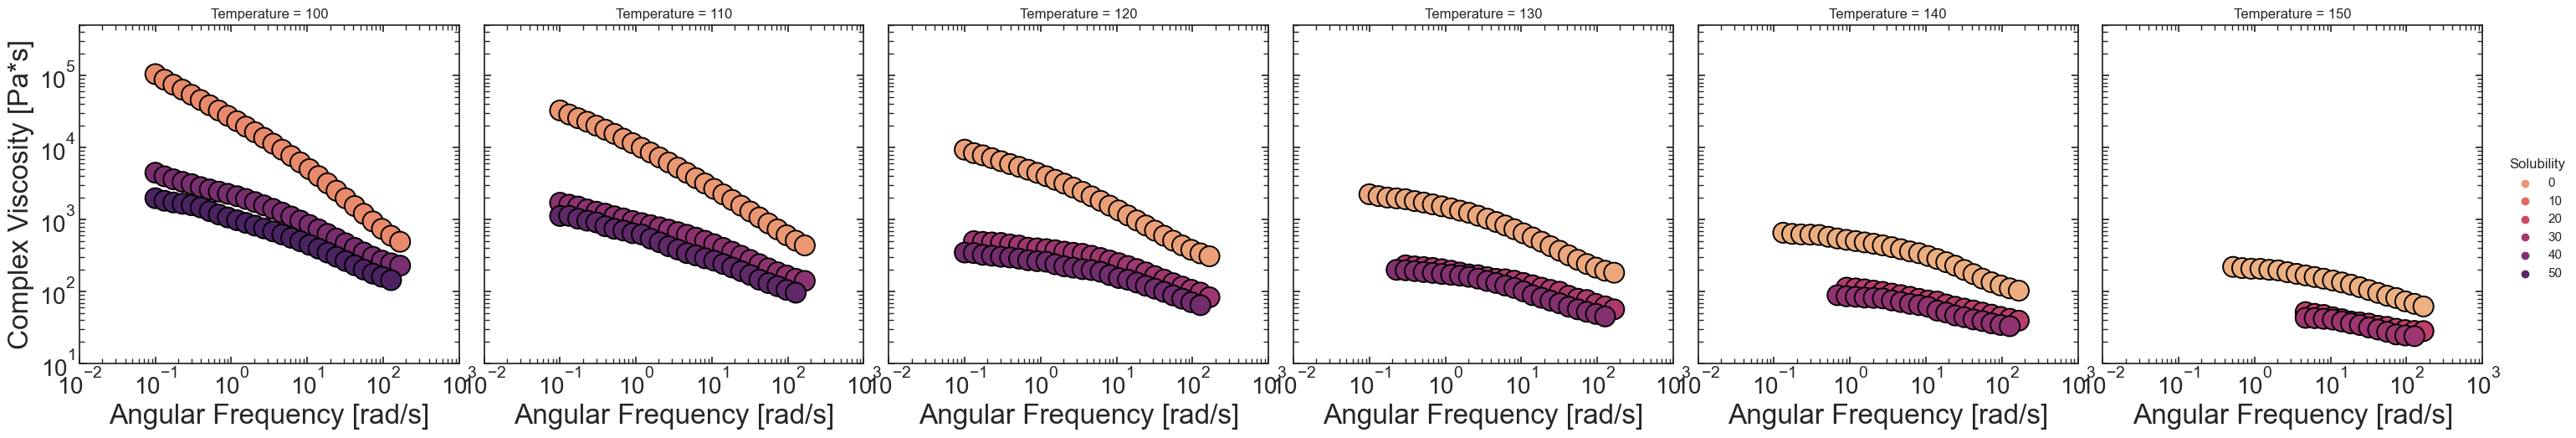

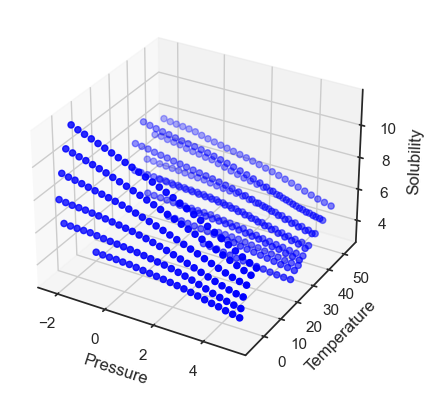

[5.53336830e+00 9.00000000e-01 1.09616127e+05 7.00000000e+01]


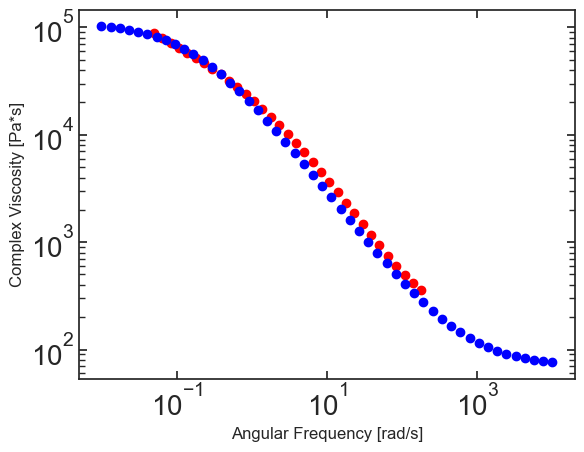

ooptimium [28.0, 960.0] 190992.082762616
ooptimium [28.1, 960.0] 190432.3286103422
ooptimium [28.200000000000003, 960.0] 190106.36963657461
ooptimium [28.300000000000004, 960.0] 189778.31994936513
ooptimium [28.400000000000006, 960.0] 189448.1734415442
ooptimium [28.500000000000007, 960.0] 189116.12584929547
ooptimium [28.60000000000001, 960.0] 188782.17845783313
ooptimium [28.70000000000001, 960.0] 188446.40400282052
ooptimium [28.80000000000001, 960.0] 188108.61324097446
ooptimium [28.900000000000013, 960.0] 187768.69279689319
ooptimium [29.000000000000014, 960.0] 187426.6365316942
ooptimium [29.100000000000016, 960.0] 187082.43830007775
ooptimium [29.200000000000017, 960.0] 186736.0919502958
ooptimium [29.30000000000002, 960.0] 186387.59132412096
ooptimium [29.40000000000002, 960.0] 186036.93025681446
ooptimium [29.50000000000002, 960.0] 185701.79230559175
ooptimium [29.600000000000023, 960.0] 185444.3765861215
ooptimium [29.700000000000024, 960.0] 185184.31862141984
ooptimium [29.8

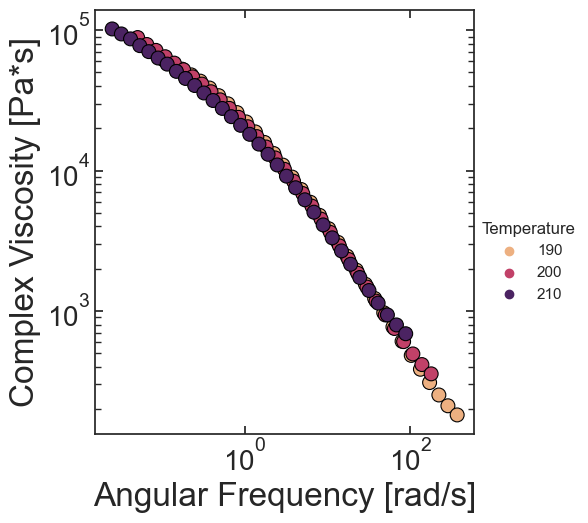

[5.53336830e+00 9.00000000e-01 1.09616127e+05 7.00000000e+01]


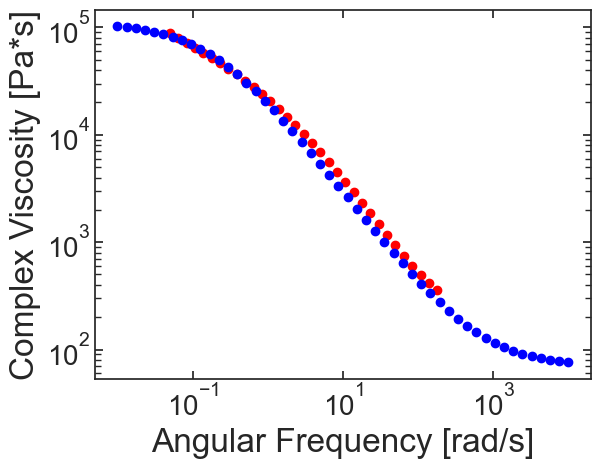

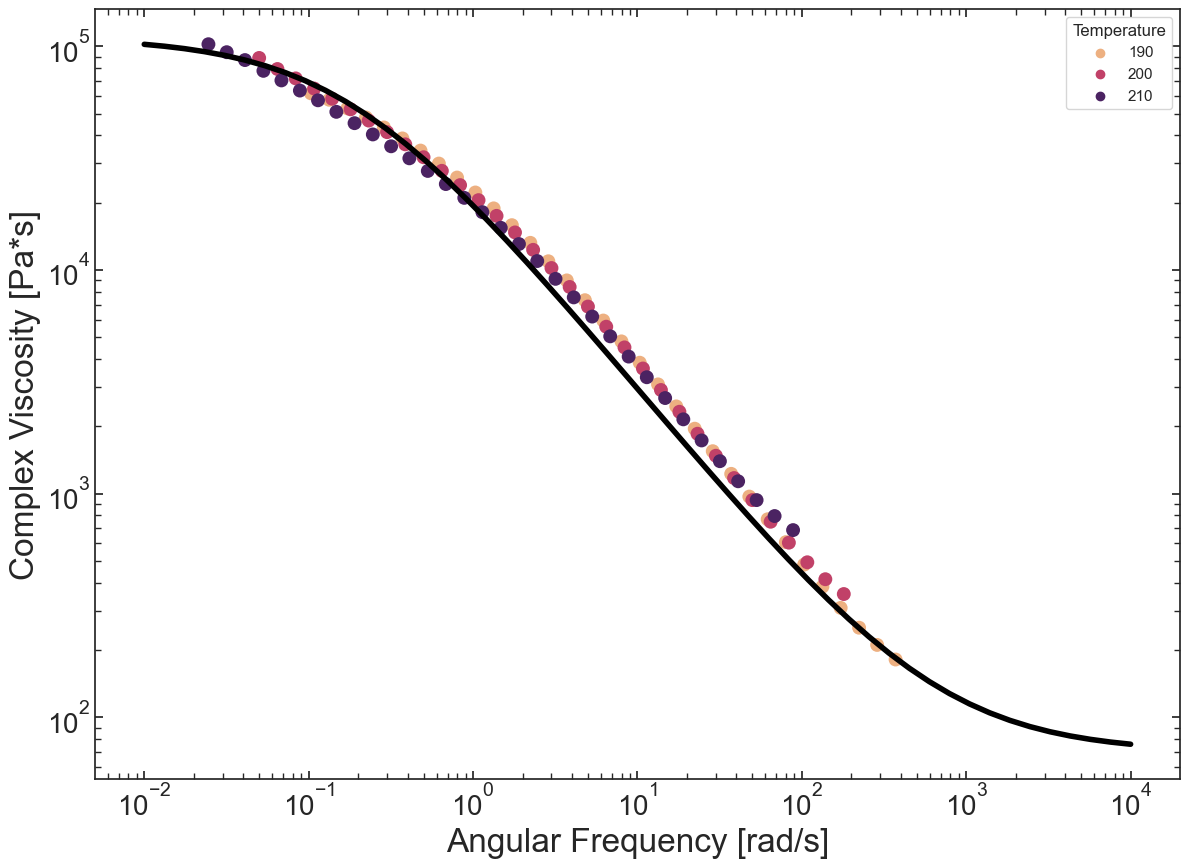

In [78]:
#fit constants to cross model at 200C
#analyzing CO2 data

#Hi
import csv
import pandas as pd
import glob
import os
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.signal import savgol_filter
from scipy import special as spe
import seaborn as sns
import math
from scipy import stats
from scipy.optimize import curve_fit, minimize
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3
# Apply the default theme

#style guidelines for Seaborne
sns.set(rc={"xtick.top" : True, "ytick.right" : True})
sns.set_theme()  
sns.set_style(style='white')
sns.set_style("ticks")

sns.set_style({"xtick.direction": "in","ytick.direction": "in"})



def crossModel(x,k,n,zeroS,infS):
    
    return ((zeroS-infS)/(1+(k*x)**n)+infS)

#fit for concentration
def fitAt(xc,C1,C2):
    k=1.49109545
    n = 0.656460753
    zeroS = 8754.40717
    infS = 25
    x,c = xc
    co = 0
    C1_1 = np.log(C1)
    C2_1 = np.log(C2)
    at =10**(-C1*(c-co)/(C2+c-co))
    return ((zeroS-infS)/(1+(k*x* at )**n)+infS)/at

path = "I:\My Drive\Research\OtherProjects\HiPressure/ML/SS/CDA_ATM.xlsx"
DataForCDA = pd.read_excel(path, header = [0])

DataFrame1 = DataForCDA[(DataForCDA["Temperature"]== 200)] 
x= DataFrame1["Angular Frequency"]
xlog = np.log(DataFrame1["Angular Frequency"])
z=DataFrame1["Complex Viscosity"]
zlog = np.log(DataFrame1["Complex Viscosity"])


popt, pcov = curve_fit(crossModel, x, z, bounds = ((0,0.9,100,50),(40,100,1000000,70))  )
print(popt)
fig = plt.figure()  
ax = fig.add_subplot(111)
ax.scatter(x, z, color='red')
x_range = np.logspace(-2, 4, 50)
x_rangelog = np.log(x_range)

Z = crossModel(x_range, *popt)

ax.scatter(x_range, Z, color='blue')
ax.set(yscale="log", xscale = "log")
#print("pressure",pressure)
ax.set_xlabel("Angular Frequency [rad/s]")
ax.set_ylabel( "Complex Viscosity [Pa*s]")

#ax.set_title(str(pressure)  +" Bar"+"\nk,n,ViscZero,ViscInf = " +str(popt))
ax.tick_params(which="both", right=True, labelsize = 20)
ax.tick_params(which="both", top=True)
ax.tick_params(which = "both",left=True, labelsize = 20)
#fig.set_axis_labels( , ,fontsize = 24)
#plt.savefig("I:/My Drive/Research/OtherProjects/HiPressure/RawFigs/"+str(pressure)+"barFit.png", dpi = 800)
plt.show()


#fit for concentration
def fitAt(xc,C1,C2):
    k,n,zeroS,infS = popt
    #k=1.49109545
    #n = 0.656460753
    #zeroS = 8754.40717
    #infS = 25
    x,c = xc
    co = 200
    C1_1 = np.log(C1)
    C2_1 = np.log(C2)
    at =10**(-C1*(c-co)/(C2+c-co))
    return ((zeroS-infS)/(1+(k*x* at )**n)+infS)/at

RefernceT = 200
##optimization algorithm
dataRange = np.arange(28,32,0.1)
dataRange2 = np.arange(960,965,0.1)
T = DataForCDA["Temperature"]
rOptimize = 1000000
CparamsOptimize = [0,0]
k,n,zeroS,infS = popt



for c1 in dataRange:
    for c2 in dataRange2:
        #print(c1)
        
        DataForCDA["at"] = 10**(-c1*(T-200)/(c2+T-200))
        DataForCDA["FreqShift"] = DataForCDA["Angular Frequency"]*DataForCDA["at"]
        DataForCDA["ViscShift"] = DataForCDA["Complex Viscosity"]/DataForCDA["at"]
        resid = np.sum(np.abs(DataForCDA["ViscShift"]-((zeroS-infS)/(1+(k*DataForCDA["FreqShift"] )**n)+infS)))
        if resid < rOptimize:
            rOptimize = resid
            CparamsOptimize = [c1,c2]
            print("ooptimium",CparamsOptimize,resid)

print(CparamsOptimize)
c1 = CparamsOptimize[0]
c2 = CparamsOptimize[1]
T = DataForCDA["Temperature"]
DataForCDA["at"] = 10**(-c1*(T-200)/(c2+T-200))
DataForCDA["FreqShift"] = DataForCDA["Angular Frequency"]*DataForCDA["at"]
DataForCDA["ViscShift"] = DataForCDA["Complex Viscosity"]/DataForCDA["at"]

#DataForPSRheo["CrossModelViscShift"] = ((zeroS-infS)/(1+(k*x*at)**n)+infS)
a1 = sns.relplot(
    data=DataForCDA, kind = "scatter", hue = "Temperature",
    x="FreqShift", y="ViscShift", palette = "flare",facet_kws=dict(despine=False), s = 100, edgecolor = "black"
    );
a1.set(yscale="log", xscale = "log")
for ax in a1.axes.ravel():
        
    ax.tick_params(which="both", right=True, top = True, left = True, bottom = True, labelsize = 20)
    ax.minorticks_on()
    ax.set_xscale('log')
    #ax.xaxis.set_minor_locator(plt.LogLocator(base=10.0, subs=np.arange(1, 10)))
    #ax.yaxis.set_minor_locator(plt.LogLocator(base=10.0, subs=np.arange(1, 10)))
a1.set_axis_labels( "Angular Frequency [rad/s]", "Complex Viscosity [Pa*s]" ,fontsize = 24) 
plt.savefig("I:/My Drive/Research/OtherProjects/HiPressure/RawFigs/"+"overlayCDA.png",bbox_inches='tight', dpi = 800)

plt.show()


DataForCDA1 = DataForCDA.copy()
DataForCDA = DataForCDA[(DataForCDA["Temperature"]== 200)] 
x= DataForCDA["Angular Frequency"]
xlog = np.log(DataForCDA["Angular Frequency"])
z=DataFrame1["Complex Viscosity"]
zlog = np.log(DataForCDA["Complex Viscosity"])

popt, pcov = curve_fit(crossModel, x, z, bounds = ((0,0.9,100,50),(40,100,1000000,70))  )
print(popt)

fig = plt.figure()  
ax = fig.add_subplot(111)
ax.scatter(x, z, color='red')
x_range = np.logspace(-2, 4, 50)
x_rangelog = np.log(x_range)

Z = crossModel(x_range, *popt)

ax.scatter(x_range, Z, color='blue')
ax.set(yscale="log", xscale = "log")
#print("pressure",pressure)
ax.set_xlabel("Angular Frequency [rad/s]", fontsize = 24)
ax.set_ylabel( "Complex Viscosity [Pa*s]", fontsize = 24)

#ax.set_title(str(pressure)  +" Bar"+"\nk,n,ViscZero,ViscInf = " +str(popt))
ax.tick_params(which="both", right=True, labelsize = 20)
ax.tick_params(which="both", top=True)
ax.tick_params(which = "both",left=True, labelsize = 20)
#fig.set_axis_labels( , ,fontsize = 24)
plt.savefig("I:/My Drive/Research/OtherProjects/HiPressure/RawFigs/"+"CDAFit_200.png", bbox_inches='tight',dpi = 800)
plt.show()




FitDataCDA = pd.DataFrame(x_range, columns = ["Frequency"])
FitDataCDA["CrossFit"] = crossModel(x_range, *popt)

hueOrder = ["black","black","black"]
fig, ax = plt.subplots(figsize=(14, 10))
a2 = sns.lineplot(
    data=FitDataCDA,  markers = False, color = "black",#style = "Pressure [bar]",
    x="Frequency", y="CrossFit", ax = ax, linewidth = 4
    );
a1 = sns.scatterplot(
    data=DataForCDA1, hue = "Temperature",
    x="FreqShift", y="ViscShift", palette = "flare", s = 100, edgecolor = "none", ax = ax
    );


#plt.ylim(10,500000) 
plt.yscale("log")
plt.xscale("log")

#fig.set(xlim=(0.005,50000)) 
#fig.set(yscale="log", xscale = "log"), "Complex Viscosity [Pa*s]" ,
ax.set_xlabel( "Angular Frequency [rad/s]",fontsize = 24)
ax.set_ylabel( "Complex Viscosity [Pa*s]", fontsize = 24)

#for a1 in plt.axes.ravel():
    
ax.tick_params(which="both", right=True, left= True,labelsize = 20)
ax.tick_params(which="both", bottom = True, top=True, labelsize = 20)
#ax.tick_params(which = "both",left=True, labelsize = 20)
#ax.minorticks_on()            
plt.savefig("I:/My Drive/Research/OtherProjects/HiPressure/RawFigs/FitDataCrossCDA.png", dpi = 800)

plt.show()
    
#CrossModelData = pd.DataFrame(data = )

    Temperature (K)  Pressure (MPa)  Solubility  From
0            373.15           2.068       12.74  Sato
1            373.15           2.627       16.13  Sato
2            373.15           4.093       25.29  Sato
3            373.15           4.629       28.71  Sato
4            373.15           6.038       37.53  Sato
..              ...             ...         ...   ...
86           363.00           0.000        0.00   NaN
87           353.00           0.000        0.00   NaN
88           343.00           0.000        0.00   NaN
89           333.00           0.000        0.00   NaN
90           323.00           0.000        0.00   NaN

[91 rows x 4 columns]


C:\Users\Himendra\AppData\Local\Temp\ipykernel_6196\3657158591.py:29: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  d = DataForPS.groupby(["Temperature (K)"]).mean()


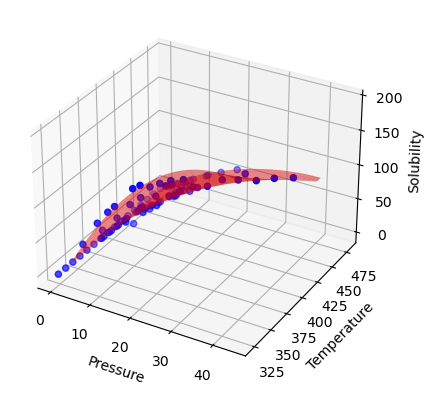

In [22]:
#analyzing CO2 data

#Hi
import csv
import pandas as pd
import glob
import os
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.signal import savgol_filter
from scipy import special as spe
import seaborn as sns
import math
from scipy import stats
from scipy.interpolate import SmoothBivariateSpline
from scipy.optimize import curve_fit, minimize
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3
# Apply the default theme

##############
#Load in our solubility data
path = "I:\My Drive\Research\OtherProjects\HiPressure/ML/SteadyStateDataPS/SolubilityPS.xlsx"
DataForPS = pd.read_excel(path, header = [0])
print(DataForPS)
UniqueTemps = DataForPS["Temperature (K)"].unique()
d = DataForPS.groupby(["Temperature (K)"]).mean()

##############################################################################################################################
#fitting solubility data
x= DataForPS["Pressure (MPa)"]
y=DataForPS["Temperature (K)"]
z=DataForPS["Solubility"]

Model = SmoothBivariateSpline(x,y,z,kx=2,ky=2, s = 0.0001,eps=0.02)


#geneate 3D representation of surface
plt.show()

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, color='blue')
x_range = np.linspace(0, 40, 50)
y_range = np.linspace(340, 480,50)
X, Y = np.meshgrid(x_range, y_range)
Z = Model.ev(X,Y)
ax.plot_surface(X,Y,Z, color='red', alpha=0.5)
ax.set_xlabel('Pressure')
ax.set_ylabel('Temperature')
ax.set_zlabel('Solubility')
plt.show()


In [74]:
## fit parameter of WLF
#analyzing CO2 data

#Hi
import csv
import pandas as pd
import glob
import os
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.signal import savgol_filter
from scipy import special as spe
import seaborn as sns
import math
from scipy import stats
from scipy.optimize import curve_fit, minimize
import matplotlib.pyplot as plt



def FitAt2(t, C1,C2):
    to = 120
    return ((-C1*(t-to)/(C2+t-to)))
#Load in our solubility data
path = "I:\My Drive\Research\OtherProjects\HiPressure/ML/SteadyStateDataPS/CombinedDataPS.xlsx"
DataForPSRheo = pd.read_excel(path, header = [0])

d = DataForPSRheo.groupby(["Temperature","Pressure"]).mean().reset_index()
d["logShift"] = np.log10(d["Shift Factor"])
d1 = d[(d["Pressure"]==0)]

popt, pcov = curve_fit(FitAt2, d1["Temperature"], (d1["logShift"]), bounds = boundInd)
print(popt)

d1["calcShift"] = FitAt2(d1["Temperature"], *popt)

[  60.        1057.3747434]
    Temperature  Pressure  Angular Frequency  Complex viscosity  Shift Factor  \
0           100         0          64.990000        1721.165000     11.793744   
3           110         0          64.990000        1120.239000      3.598252   
6           120         0          24.787250        3170.477857      1.000000   
9           130         0          24.787250        1055.095357      0.234348   
12          140         0          25.701593         380.020741      0.066916   
15          150         0          31.487045         144.435364      0.021927   

    Pshift  logShift  calcShift  
0      NaN  1.071652   1.156766  
3      NaN  0.556092   0.572861  
6      NaN  0.000000  -0.000000  
9      NaN -0.630139  -0.562127  
12     NaN -1.174472  -1.113819  
15     NaN -1.659015  -1.655363  


C:\Users\Himendra\AppData\Local\Temp\ipykernel_50080\1394263207.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1["calcShift"] = FitAt2(d1["Temperature"], *popt)


In [90]:
from numpy import load
data = load('F:/Downloads/reaction.npz')
lst = data.files
t, x, ca, cb = data["t"], data["x"], data["Ca"], data["Cb"]
print(ca)
print(len(t), len(x), len(ca), len(cb))
X, T = np.meshgrid(x, t)
X = np.reshape(X, (-1, 1))
T = np.reshape(T, (-1, 1))
Ca = np.reshape(ca, (-1, 1))
Cb = np.reshape(cb, (-1, 1))
np.hstack((X, T)), Ca, Cb


[[1.000000e+00 9.048374e-01 8.187308e-01 ... 2.517499e-09 2.277927e-09
  2.061154e-09]
 [1.000000e+00 9.167943e-01 8.368339e-01 ... 2.755171e-09 2.619077e-09
  2.566345e-09]
 [1.000000e+00 9.229898e-01 8.482207e-01 ... 3.033356e-09 2.924155e-09
  2.886894e-09]
 ...
 [1.000000e+00 9.719326e-01 9.449913e-01 ... 1.073159e-05 1.058951e-05
  1.054228e-05]
 [1.000000e+00 9.719611e-01 9.450482e-01 ... 1.112289e-05 1.097611e-05
  1.092732e-05]
 [1.000000e+00 9.719893e-01 9.451047e-01 ... 1.152703e-05 1.137544e-05
  1.132504e-05]]
1 1 201 201


(array([[0.00e+00, 0.00e+00],
        [5.00e-03, 0.00e+00],
        [1.00e-02, 0.00e+00],
        ...,
        [9.90e-01, 1.00e+01],
        [9.95e-01, 1.00e+01],
        [1.00e+00, 1.00e+01]]),
 array([[1.000000e+00],
        [9.048374e-01],
        [8.187308e-01],
        ...,
        [1.152703e-05],
        [1.137544e-05],
        [1.132504e-05]]),
 array([[1.000000e+00],
        [9.048374e-01],
        [8.187308e-01],
        ...,
        [1.147435e-05],
        [1.132402e-05],
        [1.127405e-05]]))